In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("lime-var.csv")

In [5]:
df.head()

,Heat ID,Actual Si,Actual lime,temperature,P (HM)
0,24C1639,0.94,13000,1388,0.16
1,24C1642,0.94,12100,1403,0.19
2,24C1656,0.94,12500,1375,0.18
3,24C1661,0.90,13000,1373,0.18
4,24C1664,0.86,12500,1388,0.17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Heat ID      1940 non-null   object 
 1   Actual Si    1940 non-null   float64
 2   Actual lime  1940 non-null   int64  
 3   temperature  1940 non-null   int64  
 4   P (HM)       1846 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 68.3+ KB


In [7]:
df.describe()

,Actual Si,Actual lime,temperature,P (HM)
count,1940.000000,1940.000000,1940.000000,1846.000000
mean,0.660866,9397.357216,1612.501031,0.550611
std,0.160513,1553.153009,84.333528,8.157626
min,0.340000,1500.000000,1304.000000,0.013000
25%,0.530000,8000.000000,1619.000000,0.170000
50%,0.660000,9000.000000,1639.000000,0.170000
75%,0.770000,10100.000000,1654.000000,0.170000
max,1.420000,15000.000000,1707.000000,180.000000


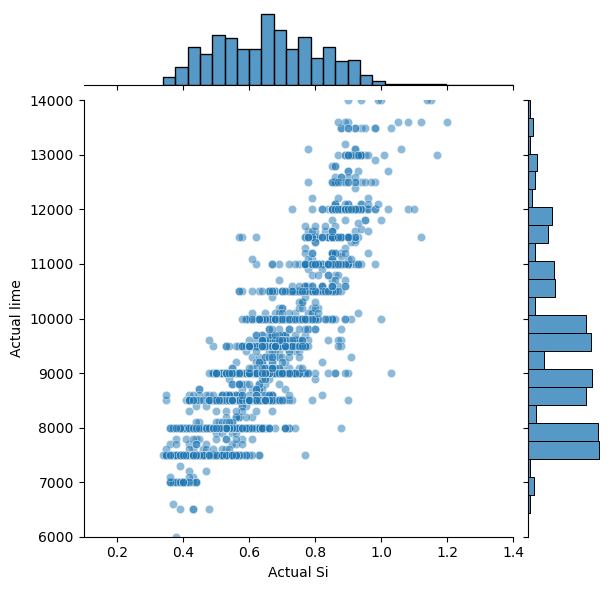

In [8]:
sns.jointplot(x="Actual Si", y = "Actual lime", data = df , alpha = 0.5)
plt.ylim(6000,14000)
plt.xlim(0.1,1.4)
plt.show()

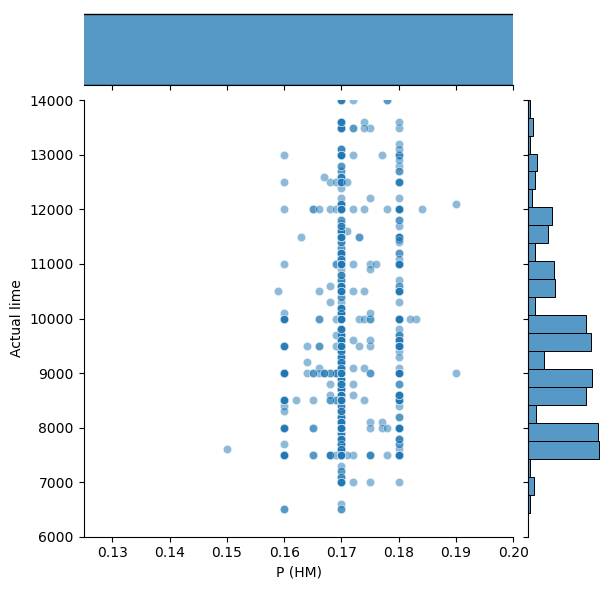

In [11]:
sns.jointplot(x="P (HM)", y = "Actual lime", data = df , alpha = 0.5)
plt.ylim(6000,14000)
plt.xlim(0.125,0.2)
plt.show()

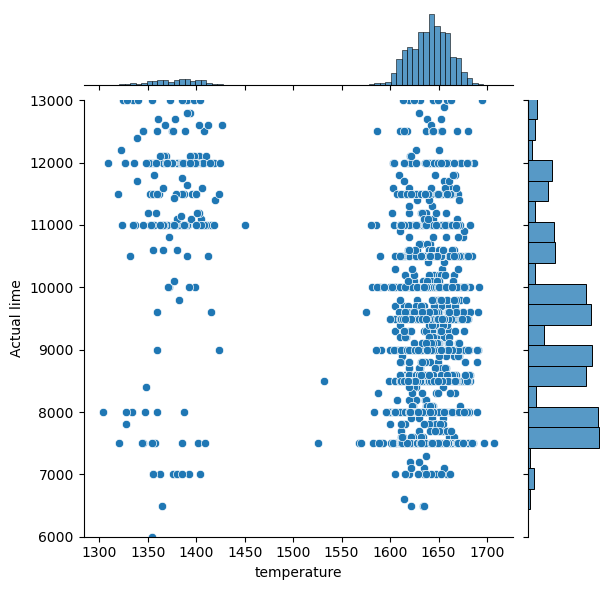

In [12]:
sns.jointplot(x="temperature",y = "Actual lime", data = df)
plt.ylim(6000,13000)
plt.show()

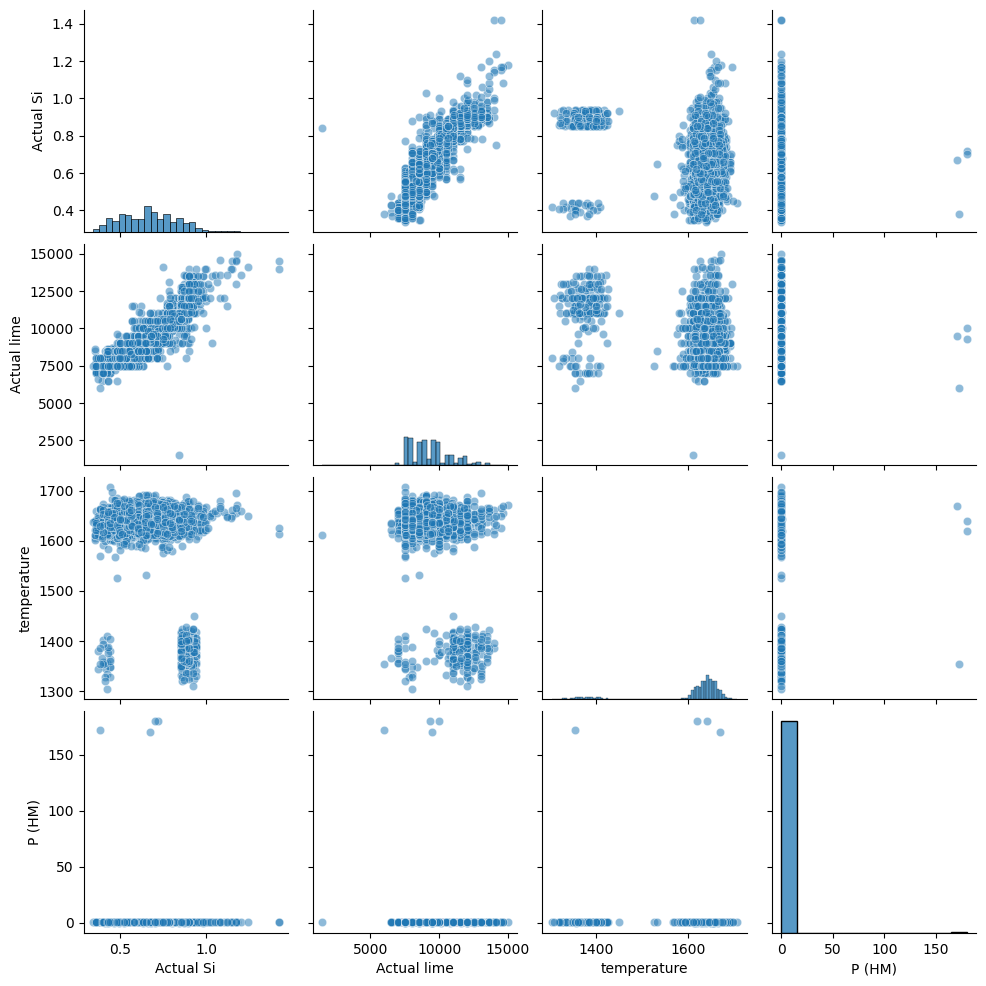

In [13]:
sns.pairplot(df,kind="scatter", plot_kws={'alpha':0.5})

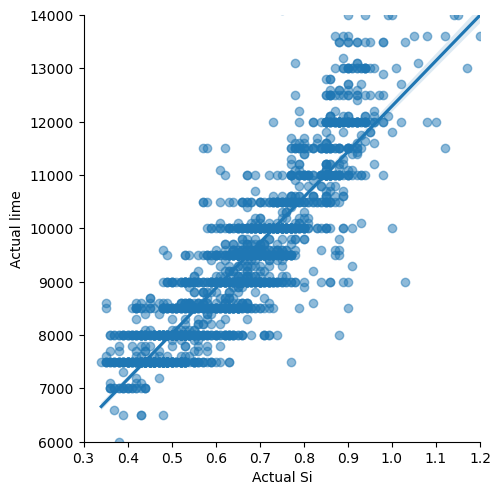

In [14]:
sns.lmplot(x='Actual Si', y = 'Actual lime', data = df , scatter_kws = {'alpha':0.5})
plt.ylim(6000,14000)
plt.xlim(0.3, 1.2)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[["Actual Si"]]
y = df["Actual lime"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [18]:
X_train

,Actual Si
428,0.44
1464,0.54
705,0.74
669,0.67
31,0.86
...,...
1130,0.49
1294,0.79
860,0.93
1459,0.83


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
lm.coef_

array([8546.70689157])

In [23]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coef'])
print(cdf)

                  coef
Actual Si  8546.706892


In [24]:
predictions = lm.predict(X_test)

In [25]:
predictions

array([ 8303.17184715,  9328.77667414, 11379.98632811, 10268.91443221,
       12234.65701727,  8474.10598498,  9414.24374305,  8901.44132956,
        9670.6449498 ,  9670.6449498 ,  9414.24374305,  8217.70477823,
        9157.8425363 ,  9328.77667414,  8815.97426064, 10525.31563896,
        9756.11201871, 12149.18994836,  9243.30960522,  9243.30960522,
        9670.6449498 ,  9585.17788088, 12576.52529293,  8730.50719173,
       11465.45339703,  9414.24374305,  9328.77667414, 10439.84857004,
        9414.24374305, 10525.31563896,  8132.23770932, 10012.51322546,
        7192.09995124,  8132.23770932,  8901.44132956,  8046.7706404 ,
        8217.70477823,  9328.77667414,  8730.50719173,  9499.71081197,
        9243.30960522, 11123.58512137,  9328.77667414,  8388.63891606,
       10354.38150112, 11379.98632811,  9328.77667414,  8132.23770932,
       11465.45339703,  6935.6987445 ,  7106.63288233,  7448.50115799,
       10097.98029438,  8132.23770932,  7961.30357148,  9585.17788088,
      

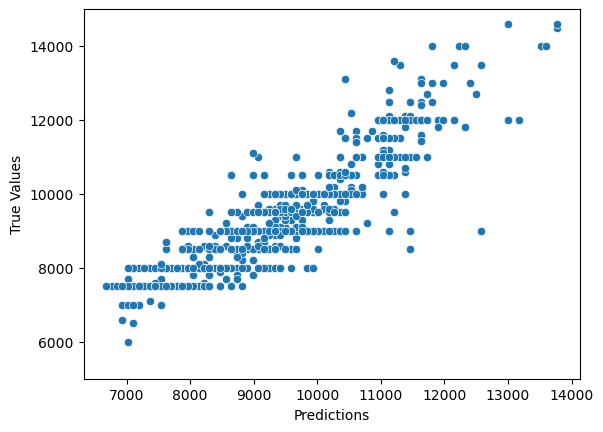

In [27]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.ylim(5000,15000)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [29]:
print("Mean Squared Error : ",mean_squared_error(y_test, predictions))
print("Mean Absolute Error : ",mean_absolute_error(y_test, predictions))
print("RMSE : ",math.sqrt(mean_squared_error(y_test, predictions)))

Mean Squared Error :  584847.1860742565
Mean Absolute Error :  516.157696180965
RMSE :  764.7530229258701


In [30]:
print(lm.intercept_)

3773.4171946135248


In [31]:
r_squared = lm.score(X, y)
print("R-squared value:", r_squared)

R-squared value: 0.7769138888149437
